An outline of steps taken to prepare the data to be visualized in the chart, such as:  
- What tools did you use for each step? (Python, SQL, Excel, etc)    

To extract data, I used SQL with codes whosn below:    
SELECT *  
FROM city_data  
WHERE city='New York' AND country='United States';    
Else, I use Python in Jupyter Notebook

- How did you calculate the moving average?  

I am using pandas rolling function with window = 30 to calculate 30 year moving average.


- What were your key considerations when deciding how to visualize the trends?

First, I use 30-year moving average because it will make line smoother. In addition, the legend is included to clearly distinguish two lines. I also include x-axis and y-axis label to make it clear for the graph. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
nyc_data = pd.read_csv("weather/newyork.csv")
global_data = pd.read_csv("weather/global_data.csv")

In [3]:
nyc_data.head(5)

,year,city,country,avg_temp
0,1743,New York,United States,3.26
1,1744,New York,United States,11.66
2,1745,New York,United States,1.13
3,1746,New York,United States,NaN
4,1747,New York,United States,NaN


In [4]:
nyc_data.year.min()

1743

In [5]:
nyc_data.year.max()

2013

In [6]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [7]:
global_data.year.min()

1750

In [8]:
global_data.year.max()

2015

In [9]:
#add 30-year moving average column
nyc_data['ave_30year'] = nyc_data['avg_temp'].rolling(window = 30).mean()
global_data['ave_30year'] = global_data['avg_temp'].rolling(window = 30).mean()

Text(0.5,1,'30 Year Moving Average Temperature Trend')

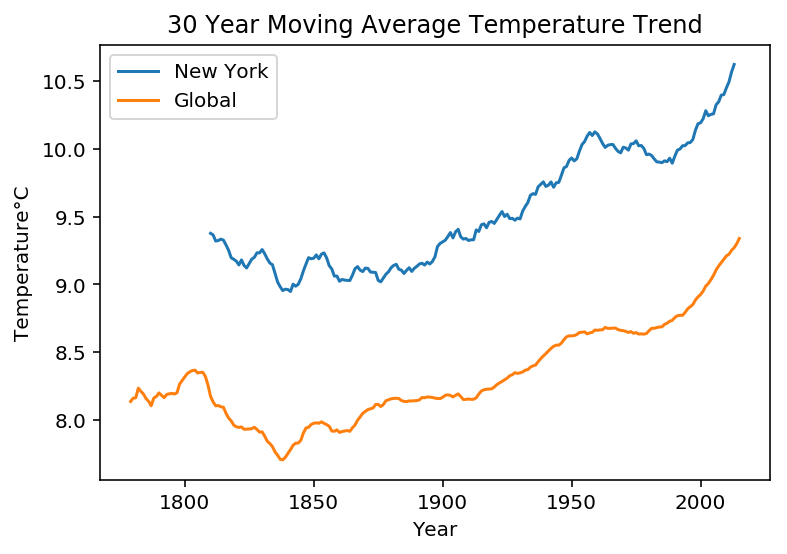

In [10]:
#plot the graph
plt.plot(nyc_data['year'],nyc_data['ave_30year'],label = "New York")
plt.plot(global_data['year'],global_data['ave_30year'],label = "Global")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature°C")
plt.title("30 Year Moving Average Temperature Trend")

### Observation 1
- On average, it is consistent that both New York City and global temperature are rising year over year. The temperature slighly dropped before 1850, but steady increased year over year afterwards.

### Observation 2
- New York City has a higher temperature(hotter) compared to global temperature, and the temperature gap between New York City and global temperature is consistent with an average of 1.2°C.

In [11]:
#merge city and global temperature data
temp_trend = nyc_data.merge(global_data, on = "year", how = "inner",suffixes = ("_nyc","_glob"))

In [12]:
temp_trend.head()

,year,city,country,avg_temp_nyc,ave_30year_nyc,avg_temp_glob,ave_30year_glob
0,1750,New York,United States,10.07,NaN,8.72,NaN
1,1751,New York,United States,10.79,NaN,7.98,NaN
2,1752,New York,United States,2.81,NaN,5.78,NaN
3,1753,New York,United States,9.52,NaN,8.39,NaN
4,1754,New York,United States,9.88,NaN,8.47,NaN


In [13]:
temp_trend['diff']=temp_trend['ave_30year_nyc']-temp_trend['ave_30year_glob']

In [14]:
#average temperature difference
temp_trend['diff'][temp_trend['diff'].notnull()].mean()

1.2031528455284595

### Observation 3
- New York City has the highest temperature in 2013 with 11.91°C and the lowest in 1779 with 0.25°C, a difference of **11.91°C**. Global temperature has the highest temperature in 2007 with 9.73°C and the lowest temperature in 1752 with 5.78°C, a difference of **3.95°C**. It is obvious that New York City has a bigger variance since only one city is accounted, on the other hand, global temperature is an average of many countries, thus a smaller variance. 



In [15]:
#calculate difference between historical high and lows for New York City
temp_trend.avg_temp_nyc.max()-temp_trend.avg_temp_nyc.min()

11.91

In [16]:
#max temperature in nyc
temp_trend[temp_trend.avg_temp_nyc==temp_trend.avg_temp_nyc.max()]

,year,city,country,avg_temp_nyc,ave_30year_nyc,avg_temp_glob,ave_30year_glob,diff
263,2013,New York,United States,12.16,10.621667,9.61,9.270667,1.351


In [17]:
#min temperature in nyc
temp_trend[temp_trend.avg_temp_nyc==temp_trend.avg_temp_nyc.min()]

,year,city,country,avg_temp_nyc,ave_30year_nyc,avg_temp_glob,ave_30year_glob,diff
29,1779,New York,United States,0.25,8.633,8.98,8.136667,0.496333


In [18]:
#calculate difference between historical high and lows for global temperature
temp_trend.avg_temp_glob.max()-temp_trend.avg_temp_glob.min()

3.95

In [19]:
#global max temperature
temp_trend[temp_trend.avg_temp_glob==temp_trend.avg_temp_glob.max()]

,year,city,country,avg_temp_nyc,ave_30year_nyc,avg_temp_glob,ave_30year_glob,diff
257,2007,New York,United States,10.63,10.346667,9.73,9.136,1.210667


In [20]:
#global min temperature
temp_trend[temp_trend.avg_temp_glob==temp_trend.avg_temp_glob.min()]

,year,city,country,avg_temp_nyc,ave_30year_nyc,avg_temp_glob,ave_30year_glob,diff
2,1752,New York,United States,2.81,NaN,5.78,NaN,NaN


### Observation 4
- According to the graph based on 30 year moving average temperature, global temperature has a smoother trend line compared to new york city's temperature trend due to many countries are accounted for global temperature. 